# Wikipedia Notable Life Expectancies
# [Notebook 11: Data Pre-processing ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_preproc_2022_10_06.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_train.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 78040 rows and 25 columns.


,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for
0,", 73, British Anglican prelate, Bishop of Tonbridge.",https://en.wikipedia.org/wiki/David_Bartleet,4,2002,NaN,73.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0.250,Europe,No Prior Region,spiritual
1,", 90, American radiologist and university professor.",https://en.wikipedia.org/wiki/Eugene_Saenger,3,2007,NaN,90.000,NaN,United States of America,NaN,1,0,0,1,0,0,0,0,0,0,0,2,0.333,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for
78038,", 74, Canadian journalist and author.",https://en.wikipedia.org/wiki/Charles_Lynch_(journalist),7,1994,NaN,74.000,NaN,Canada,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0.143,North America,No Prior Region,arts
78039,", 92, English cricketer and squash player.",https://en.wikipedia.org/wiki/Edward_Harrison_(cricketer),5,2002,NaN,92.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0.200,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for
37194,", 83, British linguist.",https://en.wikipedia.org/wiki/Roy_Harris_(linguist),5,2015,NaN,83.000,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0.200,Europe,No Prior Region,academia_humanities
6141,", 87, Dutch Antillean politician, Prime Minister of the Netherlands Antilles .",https://en.wikipedia.org/wiki/Lucina_da_Costa_Gomez-Matheeuws,4,2017,1977,87.000,NaN,Netherlands,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0.250,Europe,No Prior Region,politics_govt_law
6917,", 69, Australian politician, MP for Robertson , and judge, cancer.",https://en.wikipedia.org/wiki/Frank_Walker_(Australian_politician),10,2012,1990 1996,69.000,cancer,Australia,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0.100,Oceania,No Prior Region,politics_govt_law
31561,", 72, American mathematician.",https://en.wikipedia.org/wiki/Peter_Montgomery_(mathematician),6,2020,NaN,72.000,NaN,United States of America,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0.167,North America,No Prior Region,sciences
60190,", 42, American yachtsman, paralympian gold medallist , Lou Gehrig's disease.",https://en.wikipedia.org/wiki/Nick_Scandone,3,2009,2008,42.000,Lou Gehrig disease,United States of America,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0.333,North America,No Prior Region,sports


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78040 entries, 0 to 78039
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   info                       78040 non-null  object 
 1   link                       78040 non-null  object 
 2   num_references             78040 non-null  int64  
 3   year                       78040 non-null  int64  
 4   info_parenth               26884 non-null  object 
 5   age                        78040 non-null  float64
 6   cause_of_death             26604 non-null  object 
 7   place_1                    77919 non-null  object 
 8   place_2                    4339 non-null   object 
 9   sciences                   78040 non-null  int64  
 10  social                     78040 non-null  int64  
 11  spiritual                  78040 non-null  int64  
 12  academia_humanities        78040 non-null  int64  
 13  business_farming           78040 non-null  int

<IPython.core.display.Javascript object>

In [6]:
# Checking sum of null values by column
df.isnull().sum()

info                             0
link                             0
num_references                   0
year                             0
info_parenth                 51156
age                              0
cause_of_death               51436
place_1                        121
place_2                      73701
sciences                         0
social                           0
spiritual                        0
academia_humanities              0
business_farming                 0
arts                             0
sports                           0
law_enf_military_operator        0
politics_govt_law                0
crime                            0
event_record_other               0
num_categories                   0
recip_num_references             0
region                         121
prior_region                     0
known_for                        0
dtype: int64

<IPython.core.display.Javascript object>

## Data Pre-processing
- There are 78,040 rows and 25 columns in the training set.
- We will need to typecast our categorical columns again.
- At the outset, we can drop the following columns:
    - `num_references`
    - `cause_of_death`
    - `place_1`
    - `place_2`
- We can also drop the entries with `event_record_other` as their sole `known for` category.
- Let us convert `year` to elapsed `years`, equating 1994 with 0, and assigning the accumulated years.
- We will make a decision regarding `known_for`, `num_categories`, and `known for` category columns and drop the extraneous columns after treatment.
- After outlier detection is complete, we can drop `info`, `info_parenth`, and `link` columns.
- The missing values for `region` will need treatment.

#### Dropping Unnecessary Columns

In [7]:
# Dropping unnecessary columns
cols_to_drop = ["num_references", "cause_of_death", "place_1", "place_2"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 78040 rows and 21 columns.


<IPython.core.display.Javascript object>

#### Dropping Entries with `event_record_other` as Sole Category

In [8]:
# Dropping entries with event_record_other as sole category
index = df[df["known_for"] == "event_record_other"].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

# Check new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77662 rows and 21 columns.


<IPython.core.display.Javascript object>

#### Typecasting Categorical Columns

In [9]:
# Typecasting categorical columns
cols_to_cast = ["region", "prior_region", "known_for"]
df[cols_to_cast] = df[cols_to_cast].astype("category")

<IPython.core.display.Javascript object>

#### Adding `years`

In [10]:
# Adding years_elapsed column
df["years"] = df["year"].apply(lambda x: x - 1994)

# Checking a sample
df.sample(2)

,info,link,year,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for,years
68486,", 36, Scottish singer, songwriter and guitarist .",https://en.wikipedia.org/wiki/Scott_Hutchison,2018,"Frightened Rabbit, Mastersystem, The Fruit Tree Foundation",36.000,0,0,0,0,0,1,0,0,0,0,0,1,0.017,Europe,No Prior Region,arts,24
68766,", 76, American actress, congestive heart failure and coronary artery disease.",https://en.wikipedia.org/wiki/Irene_Vernon,1998,NaN,76.000,0,0,0,0,0,1,0,0,0,0,0,1,0.250,North America,No Prior Region,arts,4


<IPython.core.display.Javascript object>

#### Dropping `year`

In [11]:
# Dropping year column
df.drop("year", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Treating `known for` Category Columns
We will take the approach of directly treating the individual `known for` category columns, and dropping the combined `known_for` column added during EDA.

We will replace each value with its value divided by then entries total `num_categories`.  So, the resulting `num_categories` for any individual will equal 1.  Entries with multiple categories will have evenly split values for their respective `known for` categories.  Strictly speaking, it's not feasible to accurately assign proportions of these categories, which is why the approach of creating a single `known_for` column was applied during EDA, with additional categories for individuals with multiple categories.  The thought process here is that relatively more information is lost with that approach than noise will be introduced with equal division between categories.

#### Dividing `known for` Category Column Value by `num_categories`

In [12]:
# Replacing known for category column values with value/num_categories
category_cols = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "event_record_other",
]

# For loop to calculate new known for value for entries with multiple categories
for column in category_cols:
    for index in df[
        (df["known_for"] == "three_to_five") | (df["known_for"] == "two")
    ].index:
        value = df.loc[index, column]
        total = df.loc[index, "num_categories"]
        df.loc[index, column] = value / total

# Updating num_references column
df["num_categories"] = df[category_cols].sum(axis=1)

# Checking unique values in num_categories
print("Unique values in num_categories:\n\n", df["num_categories"].value_counts())

# Checking a sample of rows
df.sample(2)

Unique values in num_categories:

 1.000    77662
Name: num_categories, dtype: int64


,info,link,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for,years
3444,", 80, American artist, pulmonary embolism.",https://en.wikipedia.org/wiki/Brigid_Berlin,NaN,80.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.042,North America,No Prior Region,arts,26
16223,", 33, Russian military officer, participant in the War in Donbass, IED explosion.",https://en.wikipedia.org/wiki/Arsen_Pavlov,NaN,33.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.026,Russian Federation,No Prior Region,law_enf_military_operator,22


<IPython.core.display.Javascript object>

#### Observations:
- With the updated `known for` category column values, we can proceed to drop `num_categories`.

#### Dropping `num_categories` and `known_for`

In [13]:
# Dropping num_categories and known-for columns
cols_to_drop = ["num_categories", "known_for"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Check new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77662 rows and 19 columns.


<IPython.core.display.Javascript object>

#### Confirming Updated Columns

In [14]:
# Recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77662 entries, 0 to 77661
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       77662 non-null  object  
 1   link                       77662 non-null  object  
 2   info_parenth               26865 non-null  object  
 3   age                        77662 non-null  float64 
 4   sciences                   77662 non-null  float64 
 5   social                     77662 non-null  float64 
 6   spiritual                  77662 non-null  float64 
 7   academia_humanities        77662 non-null  float64 
 8   business_farming           77662 non-null  float64 
 9   arts                       77662 non-null  float64 
 10  sports                     77662 non-null  float64 
 11  law_enf_military_operator  77662 non-null  float64 
 12  politics_govt_law          77662 non-null  float64 
 13  crime                      7766

<IPython.core.display.Javascript object>

## Outlier Detection and Treatment

#### Function to View Outliers for Each Predictor Column

In [15]:
# Define a function that returns new dataframe of count and percentage of outliers of input dataframe columns
def outside_IQRends_pls1pt5(dataframe):
    """
    Takes input numeric dataframe and returns a dataframe of the column count 
    and percentage of values that are outliers, defined by 
    x < (Q1 - 1.5*IQR) ∪ (Q3 + 1.5*IQR) > x, where x is the value of the outlier.

    """
    count_lst = []
    perc_lst = []

    for column in dataframe:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        count = len(
            dataframe[
                (dataframe[column] < lower_whisker)
                | (dataframe[column] > upper_whisker)
            ]
        )
        percentage = round(count / len(dataframe[column]) * 100, 2)

        count_lst.append(count)
        perc_lst.append(percentage)

    outlier_dict = {"outlier_count": count_lst, "percentage_outliers": perc_lst}

    return pd.DataFrame(data=outlier_dict, index=dataframe.columns).sort_values(
        by="outlier_count", ascending=False
    )

<IPython.core.display.Javascript object>

#### Visualization of outliers

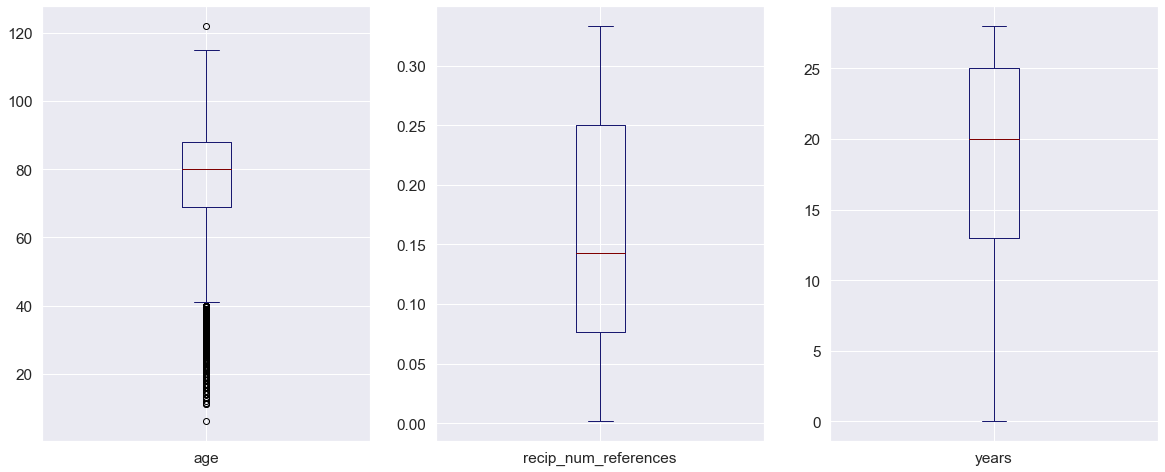

,outlier_count,percentage_outliers
age,3096,3.990
recip_num_references,0,0.000
years,0,0.000


<IPython.core.display.Javascript object>

In [16]:
# Boxplots of numerical features to view outliers
df[["age", "recip_num_references", "years"]].plot.box(
    subplots=True, figsize=(20, 8), layout=(1, 3)
)
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[["age", "recip_num_references", "years"]])

#### Observations:
- Our numeric predictors do not have any outliers.  Recall that `recip_num_references` is already a multiplicative inverse ransformation.
- The target, `age`, has at least one upper-end outlier and numerous lower-end outliers.
- In general, we would not treat the target's outliers.  However, the two most extreme values, one on either end, are worth examining more closely as they don't follow the trend of the data.

#### Examining the Most Extreme Values for Target `age`

In [17]:
df[(df["age"] > 120) | (df["age"] < 7)]

,info,link,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,recip_num_references,region,prior_region,years
45752,", 6, American child beauty queen, asphyxia by strangulation and craniocerebral trauma.",https://en.wikipedia.org/wiki/Killing_of_JonBen%C3%A9t_Ramsey,NaN,6.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.009,North America,No Prior Region,2
47182,", 122 .",https://en.wikipedia.org/wiki/Sudhakar_Chaturvedi,"claimed, Indian Vedic scholar and courier Mahatma Gandhi",122.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.027,Asia,No Prior Region,26


<IPython.core.display.Javascript object>

#### Observations:
- We will drop the lower end outlier as the entry is more correctly categorized solely as `event_record_other`.  It is unlikely the individual would have been known if not for the manner of her death.
- In contrast, we will keep the upper-end outlier, who was noteworthy in life beyond his exceptional age alone.

#### Dropping Lower-end Outlier for `age`

In [18]:
# Dropping single entry with lowest age
index = df[
    df["link"] == "https://en.wikipedia.org/wiki/Killing_of_JonBen%C3%A9t_Ramsey"
].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

#### Visualization of Outliers after Treatment

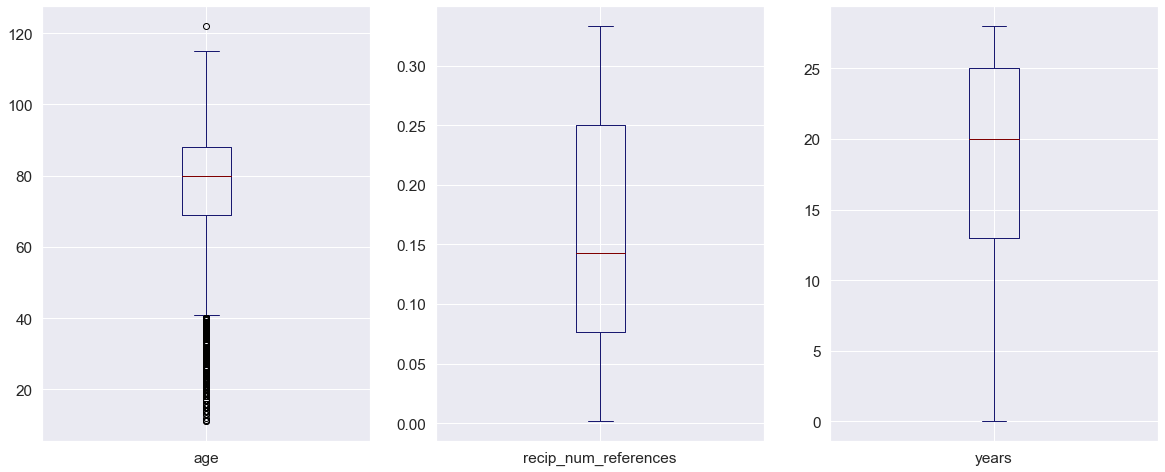

,outlier_count,percentage_outliers
age,3095,3.990
recip_num_references,0,0.000
years,0,0.000


<IPython.core.display.Javascript object>

In [19]:
# Boxplots of numerical features to view outliers
df[["age", "recip_num_references", "years"]].plot.box(
    subplots=True, figsize=(20, 8), layout=(1, 3)
)
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[["age", "recip_num_references", "years"]])

#### Dropping `info`, `info_parenth`, and `link`

In [20]:
# Dropping info, info_parenth, and link
cols_to_drop = ["info", "info_parenth", "link"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Re-check shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 77661 rows and 16 columns.


<IPython.core.display.Javascript object>

#### Checking Remaining Columns

In [21]:
# Checking remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77661 entries, 0 to 77660
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        77661 non-null  float64 
 1   sciences                   77661 non-null  float64 
 2   social                     77661 non-null  float64 
 3   spiritual                  77661 non-null  float64 
 4   academia_humanities        77661 non-null  float64 
 5   business_farming           77661 non-null  float64 
 6   arts                       77661 non-null  float64 
 7   sports                     77661 non-null  float64 
 8   law_enf_military_operator  77661 non-null  float64 
 9   politics_govt_law          77661 non-null  float64 
 10  crime                      77661 non-null  float64 
 11  event_record_other         77661 non-null  float64 
 12  recip_num_references       77661 non-null  float64 
 13  region                     7754

<IPython.core.display.Javascript object>

#### Observations:
- We are finished with the outliers and have dropped `info`, `info_parenth`, and `link` columns and are down to our target variable and the 15 predictors that we will retain for modeling.
- After briefly revisiting EDA, we will proceed to treat missing values.

## EDA Revisited

### Correlation

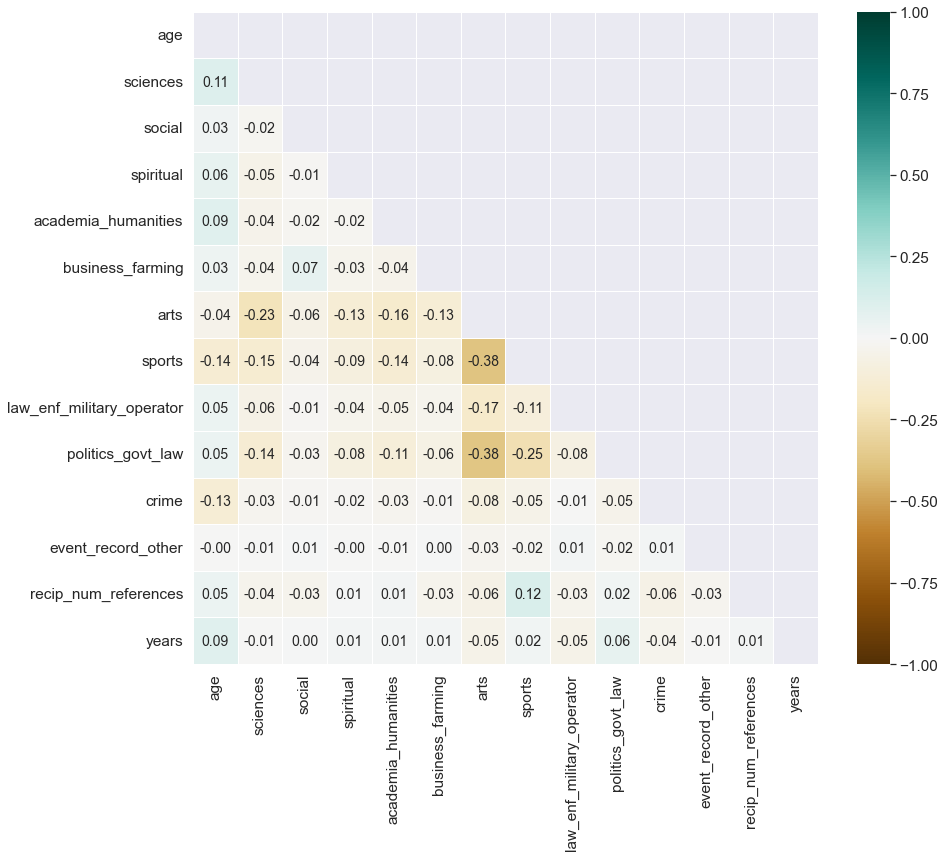

<IPython.core.display.Javascript object>

In [22]:
# Pairplot of numerical features
plt.figure(figsize=(14, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    annot=True,
    fmt=(".2f"),
    annot_kws={"size": 14},
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    mask=mask,
    linewidth=1,
)
plt.show()

#### Observations:
- We see little to no correlation with any individual numeric predictor and our target, `age`, which is not ideal for predictive modeling.  However, we do anticipate stronger relationships with the target with the predictors in combination.
- Conversely, the predictors overall show little correlation between each other, which is beneficial for modeling.
- The negative correlations between `arts` and `sports`(moderate), `arts` and `politics_govt_law` (moderate), and `sports` and `politics_govt_law` (mild) are comparable to those before treatment.
-  Compared to the same portion of the initial EDA correlation heatmap, there is more color intensity here, including with the `age` column.  Correlations have overall intensified with treatment, albeit slightly.
- Next, we will revisit the `known for` categories vs `region`.

### `region` vs ` known for` Category

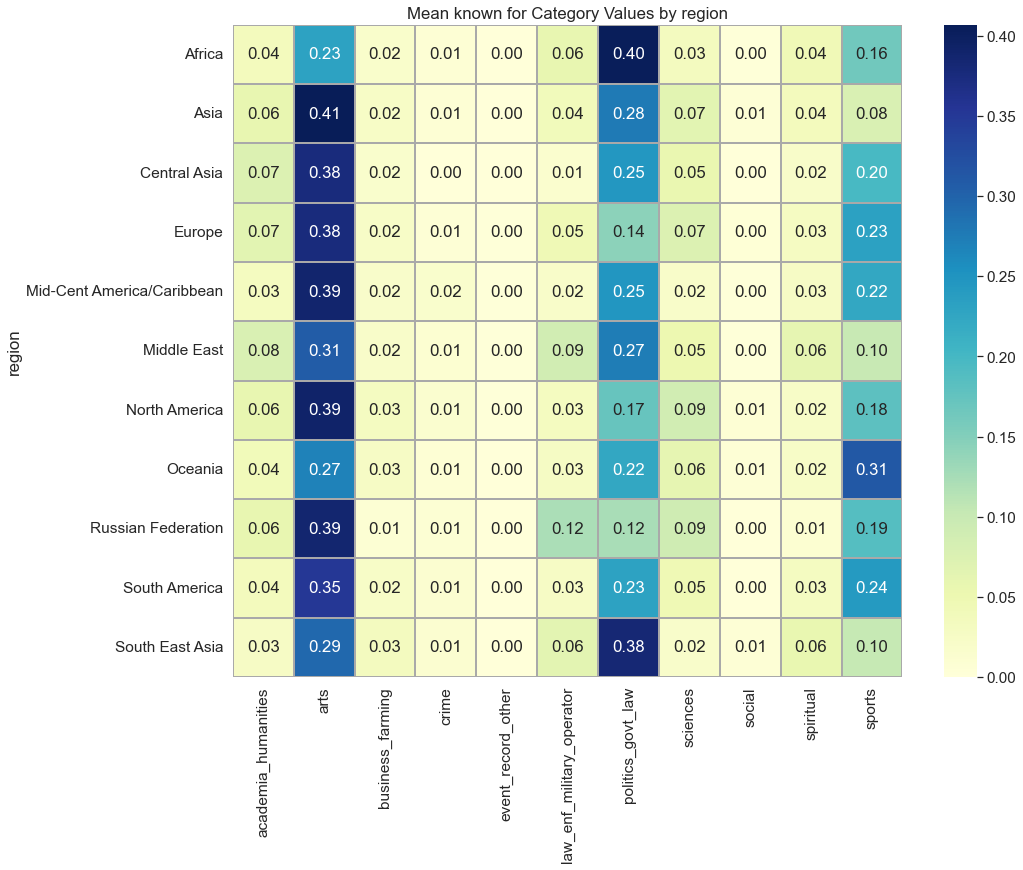

<IPython.core.display.Javascript object>

In [23]:
cols = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "event_record_other",
    "region",
]
plt.figure(figsize=(15, 12))
sns.heatmap(
    df[cols].pivot_table(index="region"),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linecolor="darkgray",
    linewidth=2,
)
plt.title("Mean known for Category Values by region")
plt.show()

#### Observations:
- This heatmap is analogous to the comparison during initial EDA, but the comparison is generated from different direction.
- Here, we see the mean treated values for the `known for` category columns by `region`.
- If there were no relationship between `region` and `known for` category, we would expect the values and colors within a column to be consistent.
- In general, they are consistent, but we see increased variation for `politics_govt_law`, `sports`, and `arts`, indicative of some dependency.
- As such, we will group entries based on `known for`, to determine the mode of the respective groups to use for imputation of missing values.

## Missing Values
There is only the one column, `region`, to treat.  However, we will proceed with the exercise of programmatically assessing missing values for any column.  

If an entry has only one `known for` category, we will group it by its category and impute the missing values for `region` with the mode of the group.  Entries with multiple `known for` categories will have imputation of missing values using the column mode.

### Imputation of Missing Values

#### Function to Return Columns with Missing Values and Their Missing Value Counts

In [24]:
# Define a function to return Series of columns of dataframe with null values and their null value counts
def null_count_4col(dataframe):
    """
    Takes input dataframe and returns Series of columns with missing values and their missing value counts
    """
    null_cols = dataframe.isnull().sum()[df.isnull().sum() > 0].index.to_list()
    if len(null_cols) > 0:
        return dataframe[null_cols].isnull().sum()
    else:
        print(
            f"There are {dataframe.isnull().sum().sum()} remaining missing values in the dataframe."
        )

<IPython.core.display.Javascript object>

#### Function to Make a List of Column Names with Missing Values

In [25]:
# Define a function to create list of columns with missing values
def null_cols(dataframe):
    """
    Takes input dataframe and returns list of column names that contain null values
    """
    null_cols = dataframe.isnull().sum()[dataframe.isnull().sum() > 0].index.to_list()
    return null_cols

<IPython.core.display.Javascript object>

#### Missing Values Before Treatment

In [26]:
# display missing values prior to imputation
null_count_4col(df)

region    116
dtype: int64

<IPython.core.display.Javascript object>

#### Imputing Missing Values for Entries with Single `known for` Category Group Mode or Column Mode

In [27]:
# List of known for known for category columns excluding event_record_other as no remaining entries as sole category
cols = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]

# Calling function to create list of columns with null values
null_cols_lst = null_cols(df)

# For loop to impute missing values with mode of rows with matching sole known for category
# or column mode if entry has multiple known for categories
for column in cols:
    for null_col in null_cols_lst:
        column_mode = df[null_col].mode()[0]
        group_rows = df[df[column] == 1].index.tolist()
        group_mode = df.loc[group_rows, null_col].mode()[0]
        df.loc[group_rows, null_col] = df.loc[group_rows, null_col].fillna(group_mode)
        df[null_col].fillna(column_mode, inplace=True)

<IPython.core.display.Javascript object>

In [28]:
# Display missing values after first imputation
null_count_4col(df)

There are 0 remaining missing values in the dataframe.


<IPython.core.display.Javascript object>

#### Observations:
- We have treated the missing values.
- The additional functions were included here to illustrate an approach for a dataset with more columns with missing values.
- Missing mean or median values could be handled similarly and we will include the above treatment for the `test` set and production pipeline.
- Let us check our columns once more before exporting the dataset.

#### Confirming Final Columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77661 entries, 0 to 77660
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        77661 non-null  float64 
 1   sciences                   77661 non-null  float64 
 2   social                     77661 non-null  float64 
 3   spiritual                  77661 non-null  float64 
 4   academia_humanities        77661 non-null  float64 
 5   business_farming           77661 non-null  float64 
 6   arts                       77661 non-null  float64 
 7   sports                     77661 non-null  float64 
 8   law_enf_military_operator  77661 non-null  float64 
 9   politics_govt_law          77661 non-null  float64 
 10  crime                      77661 non-null  float64 
 11  event_record_other         77661 non-null  float64 
 12  recip_num_references       77661 non-null  float64 
 13  region                     7766

<IPython.core.display.Javascript object>

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Saving Dataset to [wp_life_expect_preproc.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv)

In [30]:
# Saving dataset to csv
df.to_csv("wp_life_expect_preproc.csv", index=False)

<IPython.core.display.Javascript object>

In [31]:
print("Complete")

# Chime notification when cell executes
chime.success()

Complete


<IPython.core.display.Javascript object>

# [Proceed to Modeling ]()